<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Regression/Standard_Errors_for_Averages_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Standard error for average of N random variables

In [2]:
#Average of 100 Gaussians
N = 100
StdError = 1/np.sqrt(N)
print(f"Number of RVs to average: {N}")
print(f"95% Confidence Interval: [{-2*StdError},{2*StdError}]")
print("\n")

print("---- 20 tests ----")
for i in range(20): #repeat the experiment 20 times
  A = np.mean(np.random.randn(N))

  print(f'Avg: {A:.2f}. In 95% CI? {np.abs(A)<2*StdError}.')

Number of RVs to average: 100
95% Confidence Interval: [-0.2,0.2]


---- 20 tests ----
Avg: 0.01. In 95% CI? True.
Avg: 0.02. In 95% CI? True.
Avg: -0.14. In 95% CI? True.
Avg: 0.13. In 95% CI? True.
Avg: 0.04. In 95% CI? True.
Avg: 0.03. In 95% CI? True.
Avg: 0.03. In 95% CI? True.
Avg: 0.02. In 95% CI? True.
Avg: -0.04. In 95% CI? True.
Avg: -0.08. In 95% CI? True.
Avg: -0.09. In 95% CI? True.
Avg: -0.04. In 95% CI? True.
Avg: 0.11. In 95% CI? True.
Avg: -0.02. In 95% CI? True.
Avg: -0.07. In 95% CI? True.
Avg: -0.03. In 95% CI? True.
Avg: 0.00. In 95% CI? True.
Avg: 0.01. In 95% CI? True.
Avg: -0.26. In 95% CI? False.
Avg: -0.02. In 95% CI? True.


In [3]:
#Average of 100 Gaussians
N_per_sample = 100
StdError = 1/np.sqrt(N)
print(f"Number of RVs to average: {N_per_sample}")
print(f"95% Confidence Interval: [{-1.96*StdError},{1.96*StdError}]")
print("\n")

N_samples = 1000000
print(f"Number of Times to Rerun Experiment: {N_samples:,}\n")

print(f"---- {N_samples:,} tests ----")
A = np.mean(np.random.randn(N_samples,N_per_sample),axis=-1)
Fraction_outside_confidence_interval = np.mean(np.abs(A) > 1.96*StdError)
print(f"Percent outside confidence interval: {Fraction_outside_confidence_interval*100:.2f}%")

Number of RVs to average: 100
95% Confidence Interval: [-0.196,0.196]


Number of Times to Rerun Experiment: 1,000,000

---- 1,000,000 tests ----
Percent outside confidence interval: 5.03%


# Simple Regression

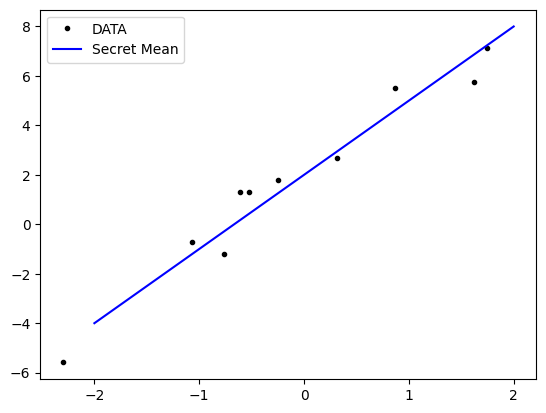

In [4]:
#-----------------------------------
#Functions to generate some toy data
#-----------------------------------

# Range of x values possible
x_min,x_max = -2, 2
Sigma = 1 #This is the irreduicble noise in each observation y_i


True_Beta_0 = 2
True_Beta_1 = 3

# "Secret" functions used to generate the data
def secret_mean_func(x):
  return True_Beta_0+True_Beta_1*x
def secret_sd_func(x):
    return 1.0*np.ones_like(x) #return all 1s but of same shape as x


# Generate random data using np.random
# X are uniform in (x_min,x_max)
# Y generated according to secret mean and sd functions
def generate_data(N):
  def mean_zero_var_one_noise(N):
    return np.random.randn(N)
    #return (np.random.randn(N)**2 - 1)/np.sqrt(2) #Another option

  X = np.random.randn(N) #uniform(x_min,x_max,size=N)
  Epsilon = mean_zero_var_one_noise(N)
  Y = secret_mean_func(X)+Sigma*mean_zero_var_one_noise(N)

  return X,Y

N = 10
np.random.seed(1)
X,Y = generate_data(N)
x_axis = np.linspace(x_min,x_max,1000)
plt.plot(X,Y,'k.',label='DATA')
plt.plot(x_axis,secret_mean_func(x_axis),'b-',label='Secret Mean')
plt.legend()

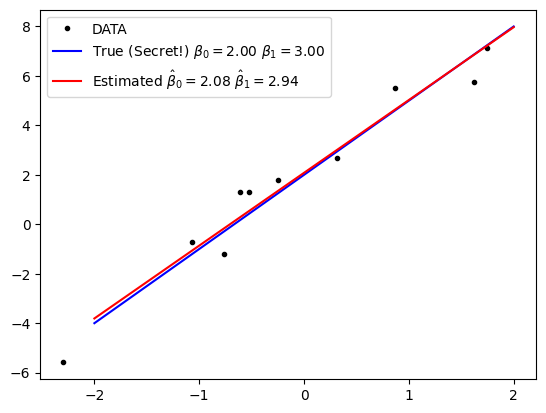

In [11]:
def lin_reg(X_data,Y_data):
  X_bar = np.mean(X_data)
  Y_bar = np.mean(Y_data)
  Beta_hat_1 = np.sum( (X_data-X_bar)*(Y_data-Y_bar) )/np.sum( (X_data-X_bar)**2 )
  Beta_hat_0 = Y_bar - Beta_hat_1*X_bar
  return Beta_hat_0, Beta_hat_1

Beta_hat_0, Beta_hat_1 = lin_reg(X,Y)
plt.plot(X,Y,'k.',label='DATA')
my_label = "True (Secret!)"+r' $\beta_0 = $'+f'{True_Beta_0:.2f}'+r' $\beta_1 = $'+f'{True_Beta_1:.2f}'
plt.plot(x_axis,secret_mean_func(x_axis),'b-',label=my_label)
my_label = "Estimated " + r'$\hat{\beta}_0 = $' + f'{Beta_hat_0:.2f}' + r' $\hat{\beta}_1 = $' + f'{Beta_hat_1:.2f}'
plt.plot(x_axis,Beta_hat_0 + Beta_hat_1*x_axis, 'r-',label= my_label)
plt.legend()


# Standard Errors

Standard Error Beta 0: 0.30520583172422594
Standard Error Beta 1: 0.26553711520498147


Beta_0 and Beta_1 estimates:
Trial 0: 2.23, 3.29
Trial 1: 2.24, 2.80
Trial 2: 1.82, 2.48
Trial 3: 2.33, 3.08
Trial 4: 2.38, 3.04
Trial 5: 1.63, 3.68
Trial 6: 1.90, 2.49
Trial 7: 2.11, 3.37
Trial 8: 1.96, 3.12
Trial 9: 2.15, 3.10
Trial 10: 2.16, 3.20
Trial 11: 1.78, 3.10
Trial 12: 1.76, 3.16
Trial 13: 2.12, 2.49
Trial 14: 1.77, 2.77
Trial 15: 1.71, 2.89
Trial 16: 1.87, 3.23
Trial 17: 2.29, 2.66
Trial 18: 2.17, 3.88
Trial 19: 1.77, 2.16


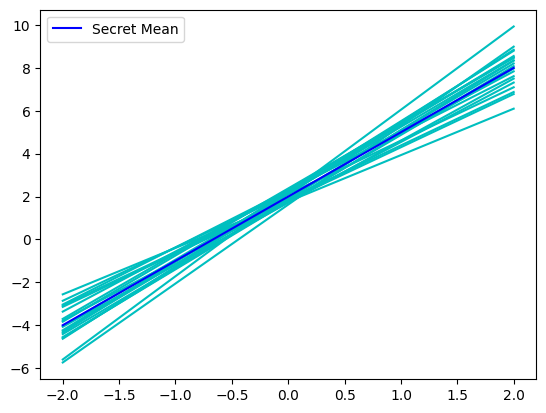

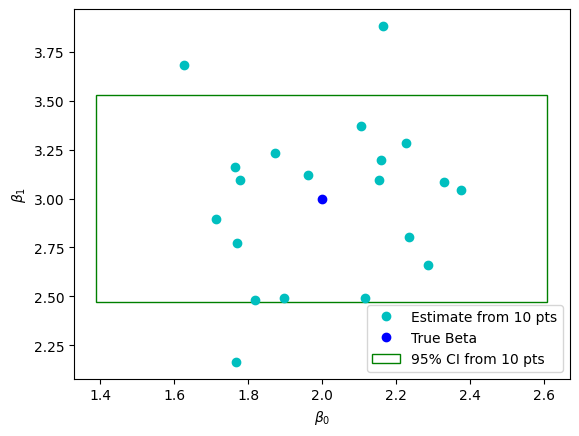

In [12]:
N_trials = 20

X_bar = np.mean(X)
SE_Beta_0 = np.sqrt(Sigma**2*( 1 / N + X_bar / np.sum( (X - X_bar)**2 ) ))
SE_Beta_1 = np.sqrt(Sigma**2/np.sum( (X - X_bar)**2 ))
print(f"Standard Error Beta 0: {SE_Beta_0}")
print(f"Standard Error Beta 1: {SE_Beta_1}")
print("\n")


Beta_0_estimates = np.zeros(N_trials)
Beta_1_estimates = np.zeros(N_trials)

print("Beta_0 and Beta_1 estimates:")
for i in range(N_trials):
  X,Y = generate_data(N)
  Beta_hat_0,Beta_hat_1 = lin_reg(X,Y)
  #my_label = r'$\hat{\beta}_0 = $' + f'{Beta_hat_0:.2f}' + r' $\hat{\beta}_1 = $' + f'{Beta_hat_1:.2f}'
  plt.plot(x_axis,Beta_hat_0 + Beta_hat_1*x_axis, 'c-')
  Beta_0_estimates[i] =  Beta_hat_0
  Beta_1_estimates[i] =  Beta_hat_1
  print(f"Trial {i}: {Beta_hat_0:.2f}, {Beta_hat_1:.2f}")

plt.plot(x_axis,secret_mean_func(x_axis),'b-',label='Secret Mean')

plt.legend()
plt.show()

####Standard Errors####

plt.plot(Beta_0_estimates, Beta_1_estimates,'co',label=f"Estimate from {N} pts" )
plt.plot([True_Beta_0], [True_Beta_1],'bo',label="True Beta")
plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\beta_1$")


plt.gca().add_patch(Rectangle((True_Beta_0 - 2*SE_Beta_0, True_Beta_1 - 2*SE_Beta_1),4*SE_Beta_0,4*SE_Beta_1,linewidth=1,edgecolor='g',facecolor='none',label=f"95% CI from {N} pts"))
plt.legend()
